In [1]:
import numpy as np

## 2.1 scalars, vectors, matrices and tensors## 

scalars: a single number. often used in linear algebra to scale objects of higher dimension (vectors, etc.)

vectors: a 1-dim array of numbers. In many cases it is useful to think of vectors as identifiying arrows or points in n-dimensional space, where n is the number of elements in the vector

matrices: a 2-dim array of numbers. matrices are often used to describe linear transformations in n-dim space. 

tensors: an n-dim array, where n > 2.


### np vector ###
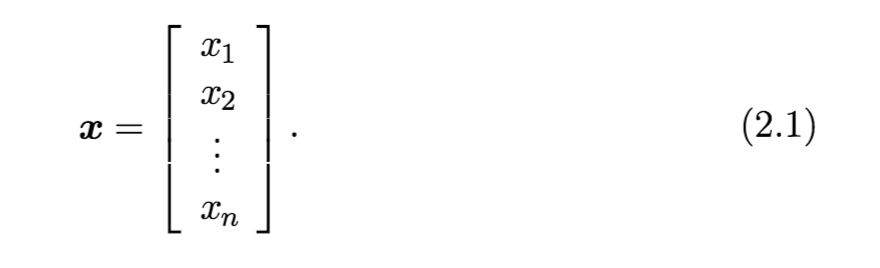

In [57]:
x = np.array([4,5,7])
x

array([4, 5, 7])

In [58]:
#indexing and shape
print('shape of x:', x.shape, end='\n\n')

print('x1...xn')
for i in range(len(x)): 
    print('x{}: {}   (arr idx {})'.format(i+1,x[i],i))

shape of x: (3,)

x1...xn
x1: 4   (arr idx 0)
x2: 5   (arr idx 1)
x3: 7   (arr idx 2)


### np matrix (A)###
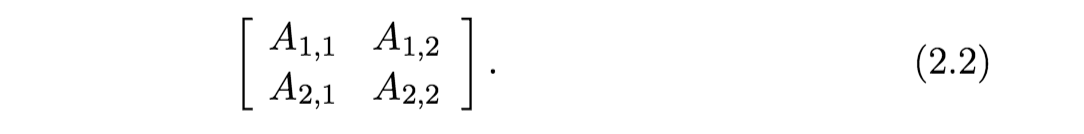

In [59]:
A = np.array([[1,2],
              [3,4]])
A

array([[1, 2],
       [3, 4]])

In [60]:
#indexing and shape
print('shape of A:', A.shape, end='\n\n')

print('x[1,1]...A[2,2]')
for i in range(len(A)):
    for j in range(len(A[i])):
        print('x{},{}: {}   (arr idx {},{})'.format(i+1,j+1,A[i,j],i,j))

shape of A: (2, 2)

x[1,1]...A[2,2]
x1,1: 1   (arr idx 0,0)
x1,2: 2   (arr idx 0,1)
x2,1: 3   (arr idx 1,0)
x2,2: 4   (arr idx 1,1)


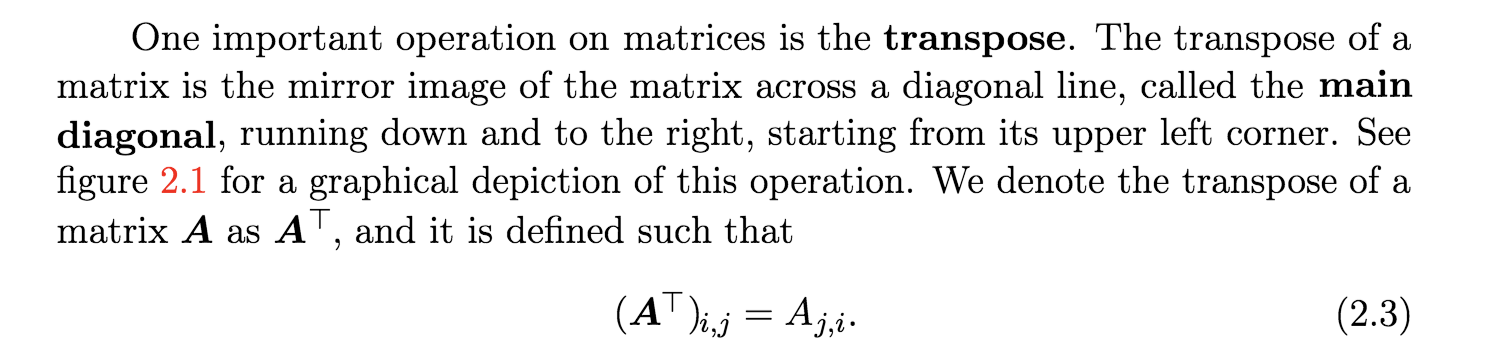

In [61]:
A_t = np.transpose(A)
A_t

array([[1, 3],
       [2, 4]])

In [62]:
#3x3 transpose 
A3 = np.array([[1,2,3],
               [4,5,6],
               [7,8,8]])
A3

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 8]])

In [63]:
np.transpose(A3)

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 8]])

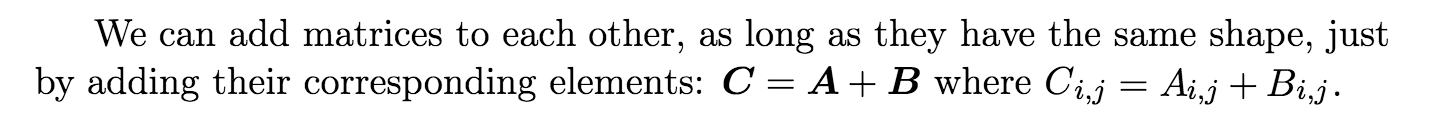

In [64]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[2,2],
              [2,2]])
C = A + B
C

array([[3, 4],
       [5, 6]])

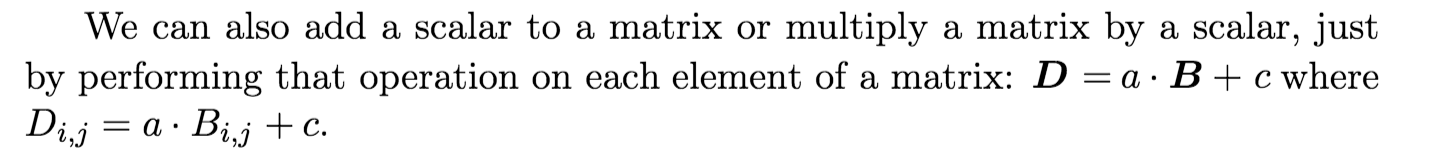

In [65]:
a,c = 10,5
B = np.array([[0,1],
              [2,3]])
#   10*B + 5
D = a*B + c
D

array([[ 5, 15],
       [25, 35]])

## 2.1 Multiplying Matrices and Vectors## 

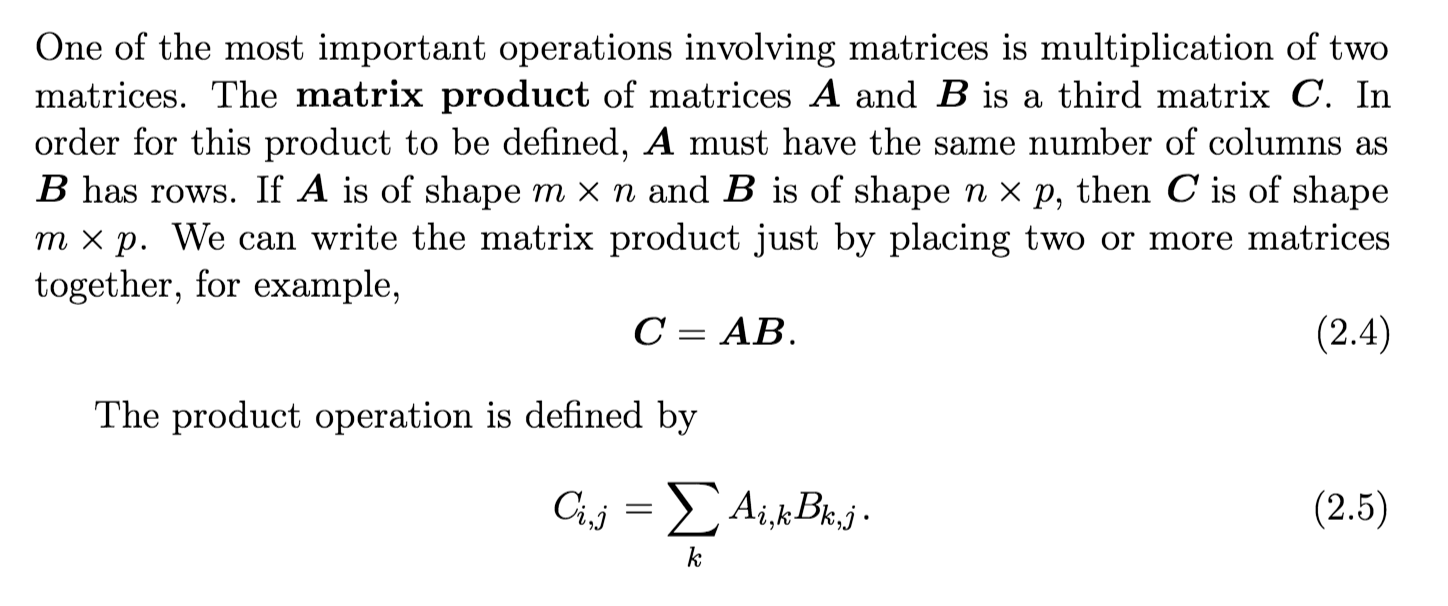
<font size="5">I like to think of eq. 2.5 as defining the element at c[i,j] as the vector dot product <br>between the ith row of A and jth col of B</font>

In [68]:
A = np.array([[1,2],
              [3,4]])

B = np.array([[1,3],
              [2,4]])

#the np dot method performs matrix multiplication in the form defined in eq. 2.5 when A and B are matrices (dim == 2d)
#this is not to be confused with the vector dot product mentioned below eq. 2.5
C = A.dot(B)
C

array([[ 5, 11],
       [11, 25]])

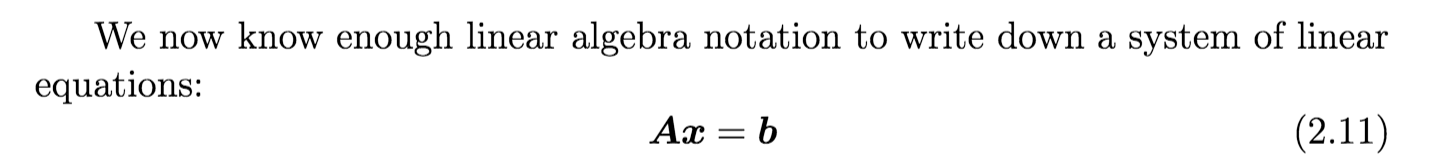
## Systems of linear equations are frequently quoted as a set of n equations with n unknowns
<br>
<font size="4">In this context, 'A' will be a n x n matrix where each row can be interpretted as the set of coefficents for one of the n equations<br><br>x will be a vector of the n unknowns and b will be the vector of right hand constants equal to each of the n equations<br></font>

### Let's see how this works in a concrete example:

<font size="4"><br>suppose we'd like to find a solution to the following system of equations</font>
<font size="5"><br><br>$$ 2s + 5t = 19 $$<br>$$ 3s - 7t = -15 $$</font>
<font size="4"><br>We could then represent this system in the following form:</font>

In [76]:
'''
A = [[2, 5],
     [3,-7]]

x = [s,
     t]

b = [19,
    -15]
    
Ax = b
''';

<font size="5">Our goal is then to find the vector x, such that the matrix-vector product Ax = b</font>
<br><br>
<font size="4"> We could approach this using elimination of substitution methods but this quickly gets out of hand for bigger systems. Instead we will look to a more powerful method known as <b>Matrix Inversion</b></font>


<br><br>
## 2.3 Identity and Inverse Matrices
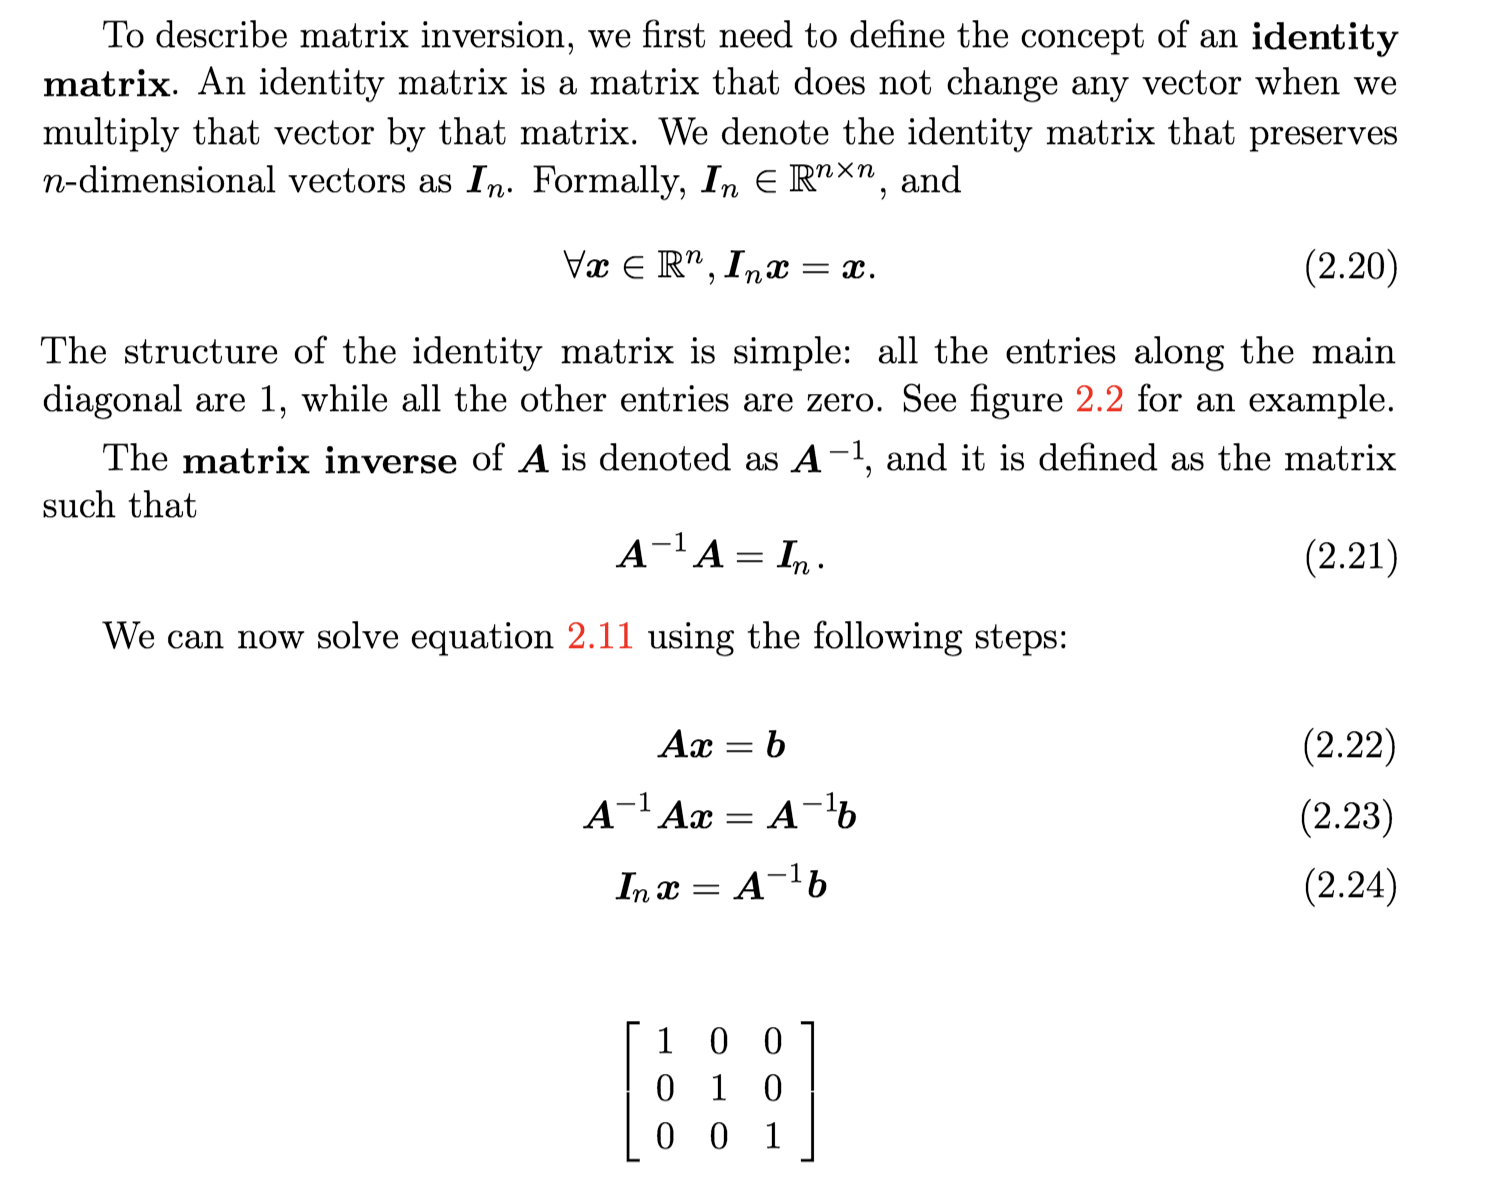

In [87]:
#identity matrix
I = np.array([[1,0],
              [0,1]])

#suppose x = [1,2]
x = np.array([1,2])

#Let's confirm Ix = x
Ix = I.dot(x)
print(x)
print(Ix)
print('Ix == x:', np.array_equal(Ix,x))

[1 2]
[1 2]
Ix == x: True


## Because Ix = x, we can find the vector x with the following equation
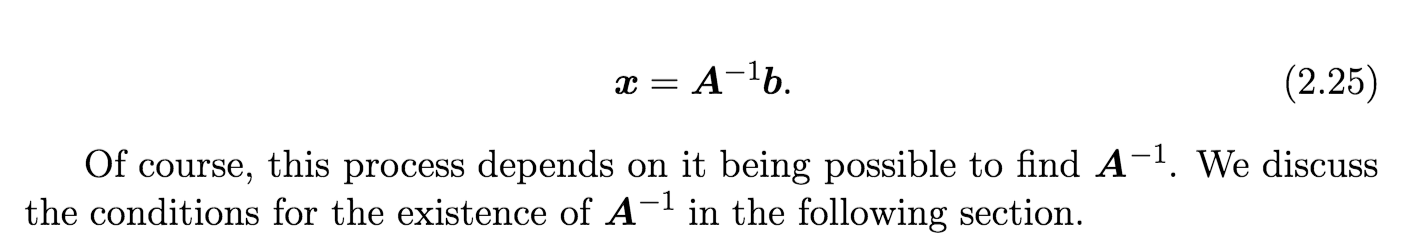